In [1]:
# Importing libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
# Reading in training data 
training_data = pd.read_csv('CE802_P2_Data/CE802_P2_Data.csv')
training_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.20,-4.91,-41.64,-21.63,8.41,2,5.42,-84.01,-9.40,76.72,-0.42,36,0.33,30.60,NaN,False
1,3.98,-5.25,-47.64,-23.43,8.66,2,4.32,-83.01,-11.16,2.72,0.50,111,0.84,39.42,9.26,True
2,12.60,0.41,-50.64,-15.51,16.34,20,-4.00,25.99,-15.08,450.72,-3.60,525,5.10,21.78,NaN,False
3,14.70,1.09,-50.64,-4.74,15.09,20,-8.16,10.99,-13.12,190.72,-5.71,660,7.25,15.78,6.57,False
4,2.74,-3.86,-35.64,-23.91,8.67,2,2.80,-53.01,-19.22,24.72,0.59,33,0.85,25.08,NaN,True


## Exploratory Data Analysis
In this section,I explore the given to training data and perform the necessary data cleaning. These steps include:
1. Inspecting the features for missing values

2. Inspecting the data type of each each feature

3. Optaining the statistical distribution of the data

4. Creating a correlation matrix between the features and class labels

5. Splitting the data set with 80-20 split for training and validation

In [3]:
# Inspecting missing values per column
training_data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [4]:
# Checking the data types for each column
training_data.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6         int64
F7       float64
F8       float64
F9       float64
F10      float64
F11      float64
F12        int64
F13      float64
F14      float64
F15      float64
Class       bool
dtype: object

In [5]:
# Getting information about the distribution of data for each column
training_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
F1,1500.0,9.937520,8.650420,0.00,2.4800,4.14,16.4000,31.40
F2,1500.0,-2.668787,2.540644,-11.70,-4.5500,-3.65,-0.1900,1.99
F3,1500.0,-58.554000,21.477945,-110.64,-80.6400,-47.64,-41.6400,-32.64
F4,1500.0,-14.751160,7.541549,-37.74,-20.5800,-17.70,-7.5300,-1.32
F5,1500.0,11.477813,3.166909,7.79,8.5100,8.87,14.2400,17.94
F6,1500.0,10.806667,9.009814,0.00,2.0000,2.00,20.0000,20.00
F7,1500.0,-1.270267,5.090345,-10.40,-6.1800,0.71,2.5000,15.46
F8,1500.0,-64.596000,40.188448,-179.01,-83.0100,-70.01,-49.0100,35.99
F9,1500.0,-11.144707,2.217929,-19.62,-12.3000,-10.84,-9.8400,-6.42
F10,1500.0,139.610667,142.833748,-19.28,28.7200,68.72,260.7200,470.72


<AxesSubplot:>

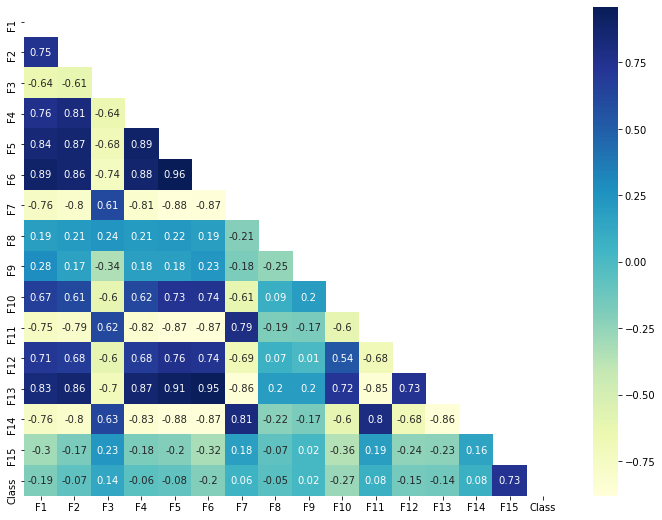

In [15]:
# PLotting the Correlation Matrix between features and class label
plt.figure(figsize=(12, 9))
correlation_matrix = training_data.corr().round(2)
zero_mask = np.zeros_like(correlation_matrix, dtype = np.bool)
zero_mask[np.triu_indices_from(zero_mask)] = True
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, mask = zero_mask)

In [16]:
# Defining the input and target sets and splitting data into training and validaion set
X = training_data.drop('Class', axis = 1)
y = training_data['Class']
train_x, validate_x, train_y, validate_y = train_test_split(X, y,test_size=0.20,stratify= y)

## Comparative study with Desicion Tree, SVC, K-NN and Naive Bayes

In this part I undertake the comparative evaluation of four models: Decision Tree Classifier, Support Vector Classifier, K-Nearest Neighbours and Naive Bayes Classifier(using Gaussian Naive Bayes). For each classifier, I perform the following steps:
1. Create a pipeline specifying the imputation strategy, type of Scaler and type of classifier to use.
2. Create a parameter grid for classifier specific hyperparameters to be optimized
3. Perform gridsearch to create the best model (i.e best hyperparameter)
4. Fit the best model with the training set
5. Perform five-fold cross validation to obtain the mean accuracy on the training set
6. Evalute the model accuracy on the validation set

In [21]:
# Decision Tree Classifier

# Building pipeline with Mean Imputation, StandardScaler and DecisionTreeClassifier
pipe_dt = Pipeline(steps = [('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
                            ('sc', StandardScaler()), 
                            ('dtreeClf', tree.DecisionTreeClassifier())])

# Building parameter dictionary for gridsearchCV
param_dt = dict(dtreeClf__criterion=['entropy', 'gini'], 
                dtreeClf__max_depth= [num for num in range(1,20)]
 )

# Defining GridsearchCV for Decision Tree Model
clf_dt_GS = GridSearchCV(pipe_dt, param_dt, n_jobs=1)

# Fitting the best model after gridsearch
clf_dt_GS.fit(train_x, train_y)

# Investigating Performance of Decision Tree Model
print('Best Parameters for Decision Tree Classifier:',clf_dt_GS.best_params_)
CV_Result_dt = cross_val_score(clf_dt_GS, train_x, train_y, cv=5, n_jobs=-1, scoring='accuracy')
print('Permformances of five fold Cross-Validation on training set:', CV_Result_dt)
print('Mean Performance of model on training set:',CV_Result_dt.mean())
print('Standard Deviation of model on training set:',CV_Result_dt.std())

# Evaluating Performance with Validation set
predicted_dt = clf_dt_GS.predict(validate_x)
print("Accuracy score on test set: ",accuracy_score(validate_y, predicted_dt))

Best Parameters for Decision Tree Classifier: {'dtreeClf__criterion': 'gini', 'dtreeClf__max_depth': 8}
Permformances of five fold Cross-Validation on training set: [0.77083333 0.74583333 0.79583333 0.77916667 0.79583333]
Mean Performance of model on training set: 0.7775000000000001
Standard Deviation of model on training set: 0.01855921454276671
Accuracy score on test set:  0.7766666666666666


In [22]:
# Comparative study with Support Vector Machine (SVM)
# Building pipeline with StandardScaler and SVM Classifier
pipe_svm = Pipeline(steps=[('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
                           ('scaler', StandardScaler()), 
                           ('classifier', svm.SVC())])

# Constructing parameter dictionary for gridsearchCV
param_svm = {
    'classifier__gamma': np.logspace(-3, 3, 5),
    'classifier__C': [1, 10, 100, 1000],
    'classifier__kernel': ['linear', 'rbf']
}

# Defining GridsearchCV for SVM Model
clf_svm_GS = GridSearchCV(pipe_svm, param_svm, n_jobs=-1)

# Fitting the best model after Gridsearching
clf_svm_GS.fit(train_x,train_y)

# Investigating Performance of SVM Classification Model
cv_result_svm = cross_val_score(clf_svm_GS, train_x, train_y, cv=5,n_jobs=-1, scoring='accuracy')
print('Best Parameters for SVM Classifier:',clf_svm_GS.best_params_)
print('Permformances of five fold Cross-Validation:',cv_result_svm)
print('Mean Performance:',cv_result_svm.mean())
print('Standard Deviation:',cv_result_svm.std())

# Evaluating Performance with validation set
predicted_svm = clf_svm_GS.predict(validate_x)
print("Accuracy score on test set: ",accuracy_score(validate_y, predicted_svm))

Best Parameters for SVM Classifier: {'classifier__C': 100, 'classifier__gamma': 0.03162277660168379, 'classifier__kernel': 'rbf'}
Permformances of five fold Cross-Validation: [0.92083333 0.875      0.9        0.8625     0.875     ]
Mean Performance: 0.8866666666666667
Standard Deviation: 0.02098279718669026
Accuracy score on test set:  0.8833333333333333


In [27]:
# K-NN

# Building Pipeline with StandardScaler and K-NN Classifier
pipe_knn = Pipeline([('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('sc', StandardScaler()),     
    ('knn', KNeighborsClassifier()) 
])

# Parameter dictionary for Gridsearch 
param_knn = {
    'knn__n_neighbors': [2,3,4,5,6,7,8,9,10, 11, 12, 13],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__weights': ['uniform', 'distance']
}

# Defining Gridsearch for K-NN Classifier
knn_clf = GridSearchCV(pipe_knn,param_knn, n_jobs= -1)

# Fitting the best model after Gridsearching
knn_clf.fit(train_x,train_y)

# Investigating performance of K-NN Classification Model 
cv_result_knn = cross_val_score(knn_clf, train_x, train_y, cv=5, n_jobs=-1, scoring='accuracy') 
print('Best Parameters for K-NN Classifier:',knn_clf.best_params_)
print('Permformances of five fold Cross-Validation:',cv_result_knn)
print('Mean Performance:',cv_result_knn.mean())
print('Standard Deviation:',cv_result_knn .std())
predicted_knn = knn_clf.predict(validate_x)
print("Accuracy score on test set: ",accuracy_score(validate_y, predicted_knn))

Best Parameters for K-NN Classifier: {'knn__algorithm': 'auto', 'knn__n_neighbors': 11, 'knn__weights': 'distance'}
Permformances of five fold Cross-Validation: [0.78333333 0.71666667 0.725      0.74583333 0.74166667]
Mean Performance: 0.7424999999999999
Standard Deviation: 0.023033791601808754
Accuracy score on test set:  0.7633333333333333


In [29]:
# Naive Bayes(i.e. GaussianNB)
pipe_nb = Pipeline([('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
                    ('sc', StandardScaler()), 
                    ('clf', GaussianNB())])
param_nb = {'clf__var_smoothing': np.logspace(-3, 3, 6)
           }
clf_nb = GridSearchCV(pipe_nb, param_nb, n_jobs=-1)
clf_nb.fit(train_x, train_y)

cv_result_nb = cross_val_score(clf_nb, train_x, train_y, cv=5, n_jobs=-1, scoring='accuracy') 
print('Best Parameters for NB Classifier:',clf_nb.best_params_)
print('Permformances of five fold Cross-Validation:',cv_result_nb)
print('Mean Performance:',cv_result_nb.mean())
print('Standard Deviation:',cv_result_nb.std())

predicted_nb = clf_nb.predict(validate_x)
print("Accuracy score on test set: ",accuracy_score(validate_y, predicted_nb))

Best Parameters for NB Classifier: {'clf__var_smoothing': 0.001}
Permformances of five fold Cross-Validation: [0.64166667 0.65416667 0.61666667 0.63333333 0.57916667]
Mean Performance: 0.625
Standard Deviation: 0.025954019170662382
Accuracy score on test set:  0.58


## Selecting the Best Model
In this section, I generate the confusion matices for all the trained classifiers above. The bes model is selected based on the relatively highest number of True Positive Predictions and True Negative Predictions

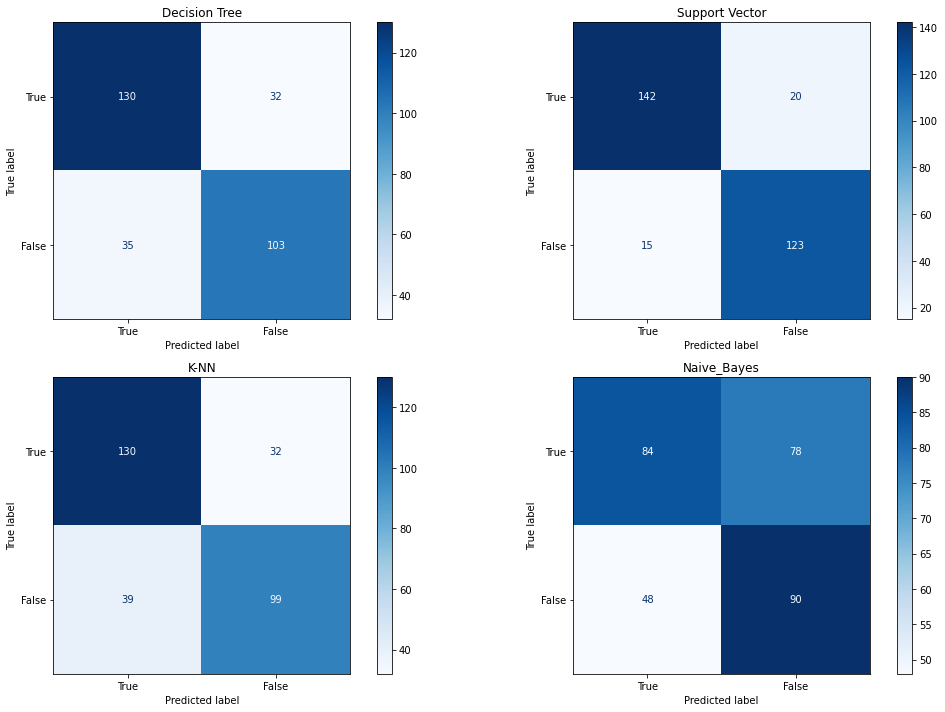

In [30]:
# Constructing the confusion matrices for all the classifiers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [clf_dt_GS, clf_svm_GS, knn_clf, clf_nb]
title_options = ['Decision Tree', 'Support Vector', 'K-NN', 'Naive_Bayes']
for cls, ax, title in zip(classifiers, axes.flatten(), title_options):
    plot_confusion_matrix(cls, 
                          validate_x, 
                          validate_y, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['True', 'False'])
    ax.title.set_text(title)
plt.tight_layout()  
plt.show()

## Making Predictions with the Best Model Selected
Using the best model determined from the section above, I make predictions on the test data and write the result to a file. 

In [31]:
# Reading in test data
test_data_original = pd.read_csv('CE802_P2_Data/CE802_P2_Test.csv')
test_data = test_data_original.copy() 
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,NaN,NaN
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,NaN,NaN
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.33,NaN
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.93,NaN
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.18,NaN


In [32]:
test_data_without_class = test_data.drop('Class', axis=1)
test_data_without_class.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,NaN
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,NaN
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.33
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.93
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.18
5,26.20,0.36,-95.64,-8.88,14.69,20,-5.76,-74.01,-7.88,390.72,-4.32,1095,6.55,14.31,6.50
6,18.90,0.17,-50.64,-17.64,14.39,20,-7.70,-29.01,-8.82,90.72,-4.72,300,5.65,13.65,6.81
7,19.60,-4.01,-50.64,-7.86,13.49,20,-6.50,10.99,-12.58,240.72,-4.83,1005,7.35,20.61,NaN
8,2.98,-5.23,-41.64,-21.39,8.07,2,7.08,-80.01,-9.80,30.72,0.46,78,0.37,29.88,NaN
9,17.30,-0.40,-80.64,-6.84,13.59,20,-6.54,-134.01,-13.20,310.72,-4.90,960,9.40,13.35,NaN


In [33]:
test_predictions = clf_svm_GS.predict(test_data_without_class)
test_data_original.loc[:, 'Class'] = test_predictions
test_data_original.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,NaN,False
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,NaN,True
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.33,True
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.93,False
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.18,True


In [35]:
# Writing predictions to a file
test_data_original.to_csv('output/CE802_P2_Test.csv', index=False)